# EDA Phase 1

The overall goal of this assignment is to take all necessary steps to inspect the quality of your data. Begin by reading through this article on Exploratory Data Analysis (EDA):

https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15

Once you’ve read through this information, choose your data set and (at a minimum) complete the tasks listed in this file.

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

<font color=green>Start by reading the data into your notebook.</font>

In [123]:
os.chdir("/Users/serrauzun/Desktop/MSDS_430_Python/EDA")
df = pd.read_csv('HR_Data.csv')

<font color=green>Why did you pick this data? Explain what you hope to learn from this data. Do you have a hunch about what this data will reveal? The answer to this question will be used in the Introduction section of the final report.</font>

The type of Corporate Human Resources dataset is one of the most common and important datasets that exists within almost all organizations today. Exploring and finding hidden patterns and reasons for employee departure as well as low satisfaction levels are the main goals of my EDA on this dataset. Improving employee retention, effective human resource management and decreasing turnover are few of the top priorities of any company nowadays, our EDA may provide valuable insight on unnoticed relationships between dependent and independent variables, which may significantly help the HR department to keep their current employees happy and avoid mistakes in their future recruitments. 

<font color=green>What is the population being represented by the data you’ve chosen? What is the total sample size?</font>

The population presented in the HR dataset is all past and present employees of a given company (the company name is confidential and was not issued with the dataset). There are 11991 unique entries in the HR dataset (seen later in the EDA), therefore the sample size is 11,991 employees. 

<font color=green>Describe how the data was collected. For example, is this a random sample? Are sampling weights used with the data?</font>

The sample of the HR dataset is not random and the data seems to be collected by the Human Resources department of the anonymous company. It does not include any personal information on any of the employees yet includes some basic  status and performance related information such as number of projects they work/worked on, average hours they spend working each month they are employed, duration of the employment with the company, whether or not they had work accidents, whether or not they were promoted within the past 5 years, whether or not they left the company or are still employed and their department. Additionally the dataset includes performance/satisfction related evaluation data. Employee satisfaction level and score they obtained in their last evaluation are recorded as percentage. As the sample represented in the dataset is a specific group of professionals that are employed by the anonymous company and the data includes the whole past and present employee population, there were no sampling weights used with our data. 

<font color=green>Inspect the data. For example, inspect the first and last 10 rows.</font>

In [124]:
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [125]:
df.tail(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
14989,0.43,0.57,2,159,3,1,1,0,technical,low
14990,0.89,0.88,5,228,5,1,1,0,support,low
14991,0.09,0.81,6,257,4,0,1,0,support,low
14992,0.40,0.48,2,155,3,0,1,0,support,low
14993,0.76,0.83,6,293,6,0,1,0,support,low
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [126]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


Above is the summary statistics for float and integer type variables

In [127]:
list(df.columns)

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'sales',
 'salary']

In [128]:
df.shape

(14999, 10)

The dataset consists of 14,999 observations (rows) and 10 variables (columns). We will now remove any duplicate rows to have a clean dataset moving forward in our EDA.

In [129]:
df_clean = df.drop_duplicates(keep='first')
print(len(df) - len(df_clean),'rows have been eliminated due to having duplicates.')

3008 rows have been eliminated due to having duplicates.


In [130]:
df = df_clean
df.shape

(11991, 10)

In [131]:
dt = df.dtypes
dt

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

There are three different types of data in the dataset, which are float, integer and object. Below we are going to identify them and group them together.

In [132]:
objList = []
intList = []
floatList = [] 

for i in dt.index:
    print("here is", i, "and here is the type", dt[i])    
    if dt[i] in (["object"]):objList.append(i)    
    if dt[i] in (["float64"]):floatList.append(i)    
    if dt[i] in (["int64"]):intList.append(i)

here is satisfaction_level and here is the type float64
here is last_evaluation and here is the type float64
here is number_project and here is the type int64
here is average_montly_hours and here is the type int64
here is time_spend_company and here is the type int64
here is Work_accident and here is the type int64
here is left and here is the type int64
here is promotion_last_5years and here is the type int64
here is sales and here is the type object
here is salary and here is the type object


In [133]:
print(" OBJECTS ")
print(" ------- ")
for i in objList :    
    print(i)

print(" INTEGER ")
print(" ------- ")
for i in intList :
    print(i)

print(" FLOAT ")
print(" ----- ")
for i in floatList :
    print(i)

 OBJECTS 
 ------- 
sales
salary
 INTEGER 
 ------- 
number_project
average_montly_hours
time_spend_company
Work_accident
left
promotion_last_5years
 FLOAT 
 ----- 
satisfaction_level
last_evaluation


In [134]:
print(df['left'].value_counts())

0    10000
1     1991
Name: left, dtype: int64


Separating the data into two; current and past employees 

In [143]:
current = df[df['left'] == 0]
past = df[df['left'] == 1]

Per the count of the values in the 'left' column, we can see that there are 10,000 current employees and 1,991 past employees, who left the company, in the dataset.

In [145]:
print(current['sales'].value_counts())

total_sales = sum(df['salary'].value_counts())
print(current['sales'].value_counts()/total_sales)

sales          2689
technical      1854
support        1509
IT              818
RandD           609
product_mng     576
marketing       561
accounting      512
hr              488
management      384
Name: sales, dtype: int64
sales          0.224252
technical      0.154616
support        0.125844
IT             0.068218
RandD          0.050788
product_mng    0.048036
marketing      0.046785
accounting     0.042699
hr             0.040697
management     0.032024
Name: sales, dtype: float64


Sales department employes most number of employees with 2,689, 22.4% of the total number of current employees.

In [97]:
print(df['salary'].value_counts())

low       7316
medium    6446
high      1237
Name: salary, dtype: int64


In [146]:
total_salary = sum(current['salary'].value_counts())
print(current['salary'].value_counts()/total_salary)

low       0.4566
medium    0.4492
high      0.0942
Name: salary, dtype: float64


Over 99% of the current employees are either in the low or medium salary group.

<font color=green>Provide a data dictionary, i.e. provide a description of the data elements and their corresponding values.</font>

The dataset requires some minor changes to some of the column/variable names

In [147]:
df.rename(columns={"average_montly_hours": "average_monthly_hours", "sales": "department", "Work_accident":"work_accident"}, inplace = True)

**Data Dictionary:**
1. **satisfaction_level** = Satisfaction level (Percentage presented in decimals with values between 0 and 1)
2. **last_evaluation** = Last evaluation score (Percentage presented in decimals with values between 0 and 1)
3. **number_project** = Number of projects employee has worked on (integer)
4. **average_monthly_hours** = Average number of hours worked per month (integer)
5. **time_spend_company** = The time employee has spent in the company (integer - in years) 
6. **work_accident** = Work accidents the employee had (binary - 1 for Yes, 0 for No)
7. **left** = If the employee left the company or not (binary - 1 for Yes, 0 for No) 
8. **promotion_last_5years** = The number of promotions the employee had in the past 5 years (binary - 1 for Yes, 0 for No)
9. **department** = Sales branch the employee is associated with (string)
10. **salary** = The level of salary the employee has (string - low/medium/high - groups of salary ranges)

In [148]:
print('There are',len(df.department.unique()),'unique departments in the dataset which are',list(df.department.unique()))

There are 10 unique departments in the dataset which are ['sales', 'accounting', 'hr', 'technical', 'support', 'management', 'IT', 'product_mng', 'marketing', 'RandD']


### Report on the quality of the data.

<font color=green>Are there rows with missing or inconsistent values? Are there any outliers or duplicate rows? If so, eliminate those rows from your data where appropriate. State how many rows were eliminated at this step. Consider some type of visual display such as a boxplot to determine any outliers. Include the rest of your work below.</font>

In [149]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

There are no missing values in any of the entries and columns

Now creating a box plot to see if there are any extreme outliers 

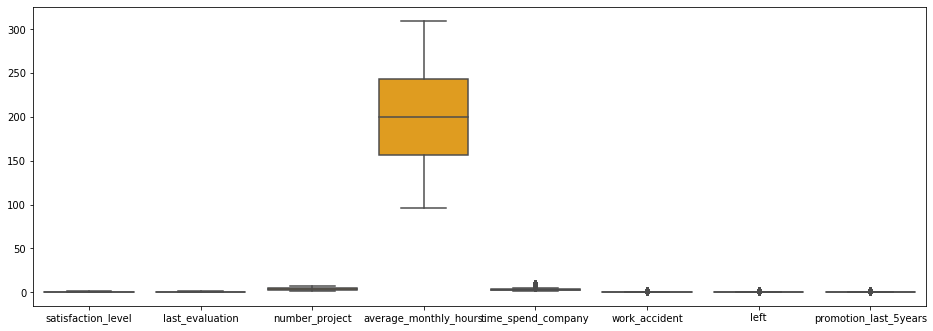

In [150]:
plt.figure(figsize=(16,5.5))
bxplt = sns.boxplot(data=df, color='orange')

There seems to be no outliers with any of the variables

Now we will plot histogram for variables that are either integer or float

4    3685
3    3520
5    2233
2    1582
6     826
7     145
Name: number_project, dtype: int64


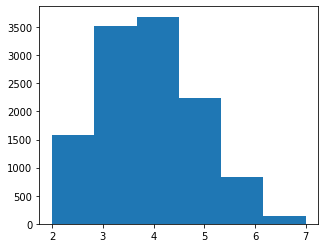

In [165]:
plt.figure(figsize=(5,4))
plt.hist(df['number_project'],bins=6)
print(df['number_project'].value_counts())

156    112
149    112
160    111
151    107
135    104
      ... 
297      5
298      5
299      5
302      5
303      5
Name: average_monthly_hours, Length: 215, dtype: int64


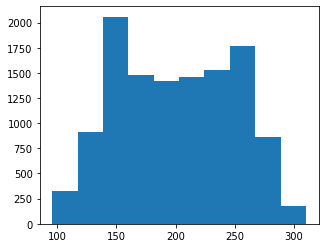

In [168]:
plt.figure(figsize=(5,4))
plt.hist(df['average_monthly_hours'],bins=10)
print(df['average_monthly_hours'].value_counts())

3     5190
2     2910
4     2005
5     1062
6      542
10     107
7       94
8       81
Name: time_spend_company, dtype: int64


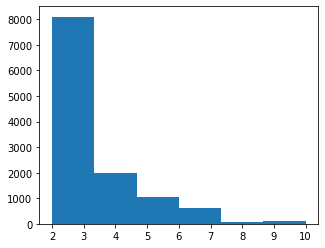

In [170]:
plt.figure(figsize=(5,4))
plt.hist(df['time_spend_company'],bins=6)
print(df['time_spend_company'].value_counts())

0    10141
1     1850
Name: work_accident, dtype: int64


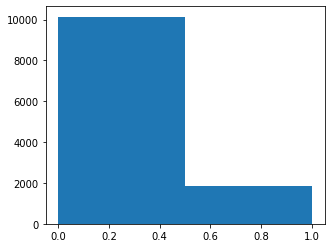

In [172]:
plt.figure(figsize=(5,4))
plt.hist(df['work_accident'],bins=2)
print(df['work_accident'].value_counts())

1,850 employees have had a work accident

0    10000
1     1991
Name: left, dtype: int64


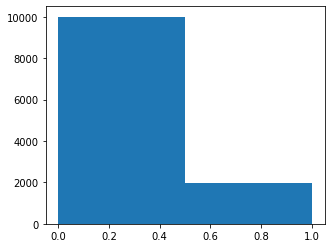

In [173]:
plt.figure(figsize=(5,4))
plt.hist(df['left'],bins=2)
print(df['left'].value_counts())

0    11788
1      203
Name: promotion_last_5years, dtype: int64
0    0.983071
1    0.016929
Name: promotion_last_5years, dtype: float64


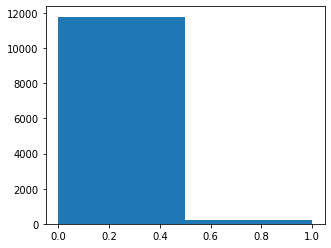

In [177]:
plt.figure(figsize=(5,4))
plt.hist(df['promotion_last_5years'],bins=2)
print(df['promotion_last_5years'].value_counts())
total_promo = sum(df['promotion_last_5years'].value_counts())
print(df['promotion_last_5years'].value_counts()/total_promo)

Over 98% of the employees haven't received a promotion

0.74    214
0.10    203
0.73    201
0.50    200
0.84    199
       ... 
0.25     29
0.26     28
0.12     26
0.28     24
0.27     23
Name: satisfaction_level, Length: 92, dtype: int64


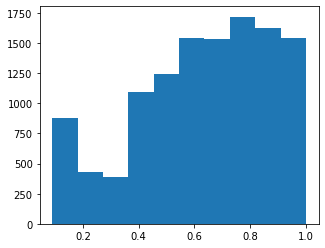

In [178]:
plt.figure(figsize=(5,4))
plt.hist(df['satisfaction_level'],bins=10)
print(df['satisfaction_level'].value_counts())

0.55    281
0.50    269
0.51    264
0.57    258
0.54    252
       ... 
0.42     45
0.43     44
0.38     42
0.44     35
0.36     19
Name: last_evaluation, Length: 65, dtype: int64


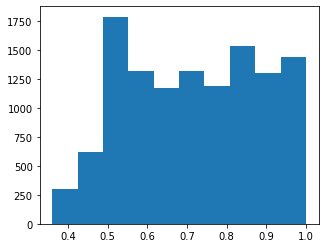

In [179]:
plt.figure(figsize=(5,4))
plt.hist(df['last_evaluation'],bins=10)
print(df['last_evaluation'].value_counts())

Now we will look at the correlation between variables

In [158]:
corrMatrix = df.corr()
corrMatrix

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,-0.350558,0.019789
last_evaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,0.013520,-0.007206
number_project,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,0.030928,-0.000544
average_monthly_hours,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,0.070409,-0.004964
time_spend_company,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.173295,0.056828
work_accident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,-0.125436,0.029852
left,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,1.000000,-0.044657
promotion_last_5years,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,-0.044657,1.000000


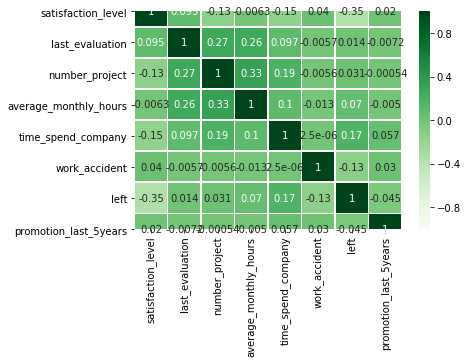

In [155]:
sns.heatmap(corrMatrix, annot=True, vmin=-1, vmax=1, linewidths=.5, cmap="Greens")
plt.show()